Funciones para abrir y graficar archivos de experimentos electroquímicos de voltamperometría cíclica (CV), amperometrías (Amp) y espectroscopía de impedancia electroquímica (EIS) proveniente de los aparatos Teq4 y PalmSens4.

Debido a las diferencias entre los archivos de salida que emiten los aparatos, se escribieron funciones para abrir cada uno de estos archivos con sus particularidades y almacenarlos en un dataframe de pandas.

Las rutinas se escribieron de tal modo que cada dataframe correspondiente al mismo experimento electroquímico manejen los mismos "headers", lo cual simplificó la función de graficación luego, ya que las mismas son comunes a los dos aparatos.

Estas funciones están basadas en la librería `PyEIS` de Kristian B. Knudsen (kknu@berkeley.edu || kristianbknudsen@gmail.com)

Diponible en https://github.com/luis87krausser/PyElectrochemical/tree/master

# Librerías necesarias

Es necesario tener instalado: `numpy`, `pandas` y `matplotlib`. Las mismas son llamadas desde `dataread.py`.

# Teq4

<img src="images/teq4.jpeg" width="300" height="300" align="center"/>

Los archivos provenientes del potenciostato/galvanostato Teq4 son `*.txt` que vienen con codificación `utf-8`, al final de cada archivo tienen 1 línea en blanco, y en particular, los correspondientes a EIS tienen una columna demás sin datos.

Para su correcta lectura, en el caso de CV o Amp, es necesario añadir en la función `pd.read_csv`:
```
sep='\t',
usecols=range(0, 3),
skipfooter = 1,
engine='python',
encoding='utf-8'
```
Y en el caso de EIS:
```
sep='\t',
usecols=range(0, 6),
skipfooter = 1,
engine='python',
encoding='utf-8'
```

# PalmSens4

<img src="images/PS4_bannerpic-2.png" width="300" height="300" align="center"/>

Los archivos provenientes del potenciostato/galvanostato PalmSens4 son `*.csv` que vienen con codificación `utf-16`,  y en particular, los correspondientes a EIS tienen una columna demás sin datos y al final de cada archivo tienen 2 líneas en blanco.
Para su correcta lectura, en el caso de CV o Amp, es necesario añadir en la función `pd.read_csv`:
```
skiprows=int(5), 
encoding='utf_16_le'
```
Y en el caso de EIS:
```
usecols=range(0, 7),
skiprows=int(5),
skipfooter = 2,
engine='python',
encoding='utf_16_le'
```

# Headers

Para manejar variables con nombre comunes y simplificar la función de graficación, se analizaron los nombres que cada aparato exporta en sus archivos, y se escribió una función que analiza los nombres dichos nombres y los modifica por nombres que serán generales para cada experimento. Esto lo hace la función `correct_text_exp` que se encuentra en el archivo `dataread.py`, y no es más que una sucesión de setencias `if`, `elif` y `else`.

A modo de ejemplo:
```
if text_header == 'freq / Hz' or text_header == 'Freq(Hz)':
        return 'f'
```
Lo que significa que si pandas lee una columna llamada `'freq / Hz'` o `'Freq(Hz)'`, cambiará su nombre a `f` en el dataframe. Para ello, primero se crea un conjunto vacío, y luego, con un ciclo `for` se realiza dicho cambio:
```
names_exp = []
for j in range(len(exp_test_header_names.columns)):
    names_exp.append(correct_text_exp(exp_test_header_names.columns[j]))
```
Al final, en el último `return` de cada función `*_expread`, se utiliza `names_exp` como nombres de las columnas, o sea añadiendo `names = names_exp` dentro de `pd.read_csv`.

# Funciones de lectura

Las funciones que abren, leen, guardan los datos en dataframes se llaman de la siguiente manera:

* Para voltamperometrías cíclicas:
    - **Teq4:** `Teq4CV_expread(path, file_name)`
    - **PalmSens4:** `PS4CV_expread(path, file_name)`
* Para amperometrías:
    - **Teq4:** `Teq4Amp_expread(path, file_name)`
    - **PalmSens4:** `PS4Amp_expread(path, file_name)`
* Para espectroscopía de impedancia electroquímica:
    - **Teq4:** `Teq4EIS_expread(path, file_name)`
    - **PalmSens4:** `PS4EIS_expread(path, file_name)`
    
Los inputs son:
- `path`: la ruta a la carpeta de trabajo. Ej.: `\datafiles\`
- `file_name`: es el archivo con los datos experimentales el cual debe colocarse con su correspondiente extensión. Ej.: `'23ciclos.txt'`

A modo de ejemplo, las funciones se invocan de la siguiente manera:
```
df_Amp = PS4Amp_expread('path', 'file_name')
```
En donde `df_Amp` es una dataframe que contiene las variables "time" y "current" que se usan para graficar los registros amperométricos.




# Funciones de graficación

Estas funciones leen y grafican datos experimentales contenidos dataframes armados con las funciones anteriormente descritas, los cuales ya poseen las columnas con nombres corregidos. Se invocan de la siguiente manera:

* Para voltamperometrías cíclicas:
    - `CV_plot(df, g_xlim='none', g_ylim='none', savefig = 'none')`
* Para amperometrías:
    - `amp_plot(df, g_xlim='none', g_ylim='none', savefig = 'none')`
* Para espectroscopía de impedancia electroquímica:
    - `Nyq_plot(df, g_xlim='none', g_ylim='none', savefig='none')`
    - `Bode_plot(df, g_xlim='none', g_ylim='none', savefig='none')`
Donde las entradas son las siguientes:
- `df`: es el dataframe que contiene los datos experimentales.
- `g_xlim`: (opcional) es un vector tipo `[xmin,xmax]` el cual setea los límites en el eje "x" del gráfco. Si es igual a `'none'` o se omite, los límites los establece matplotlib automáticamente.
- `y_xlim`: (opcional) es un vector tipo `[ymin,ymax]` el cual setea los límites en el eje "y" del gráfco. Su función es análoga a `g_xlim`.
- `savefig`: (opcional) nombre con el que se guardará el gráfico, debe añadirse la extensión `.eps`. Si es igual a `'none'` o se omite, solo se mostrará el gráfico.

# Ejemplos

## Importando
Primero debe llamarse a `dataread.py`

In [1]:
from dataread import *

## Dataframes
Se leen y se almacenan los datos experimentales en dataframes

In [14]:
df_CV = Teq4CV_expread('datafiles/','CV_example.txt')
df_CV.head()

,time,volt,current
0,0.02,674.025,0.012133
1,0.04,673.972,0.012110
2,0.06,673.855,0.012072
3,0.08,673.677,0.012018
4,0.10,673.432,0.011949


In [15]:
df_EIS = PS4EIS_expread('datafiles/','EIS_example.csv')
df_EIS.head()

,f,Z_phase,I_avg,Z_mag,re,im,Cs
0,1000.000,4.579,-47.915,3472.0,3461.0,277.185,5.742000e-07
1,794.328,5.019,-42.613,3532.0,3519.0,309.025,6.484000e-07
2,630.957,5.756,-39.127,3609.0,3590.0,361.930,6.969000e-07
3,501.187,6.487,-36.376,3668.0,3645.0,414.418,7.663000e-07
4,398.107,7.382,-34.139,3745.0,3714.0,481.241,8.307000e-07


## Graficando

### Voltamperometrías cíclicas

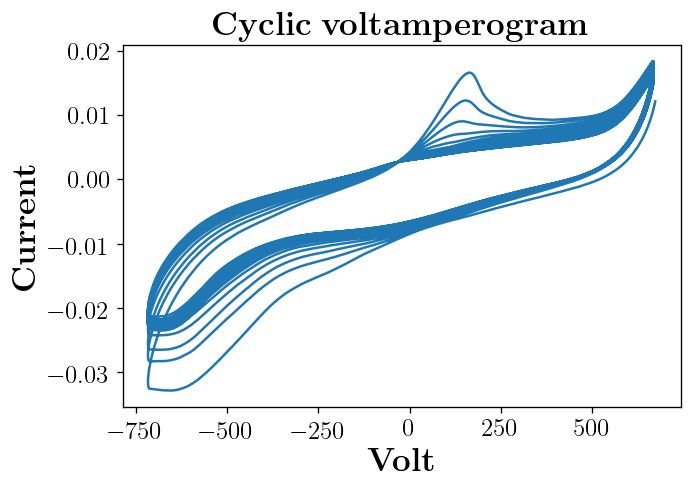

In [10]:
CV_plot(df_CV)

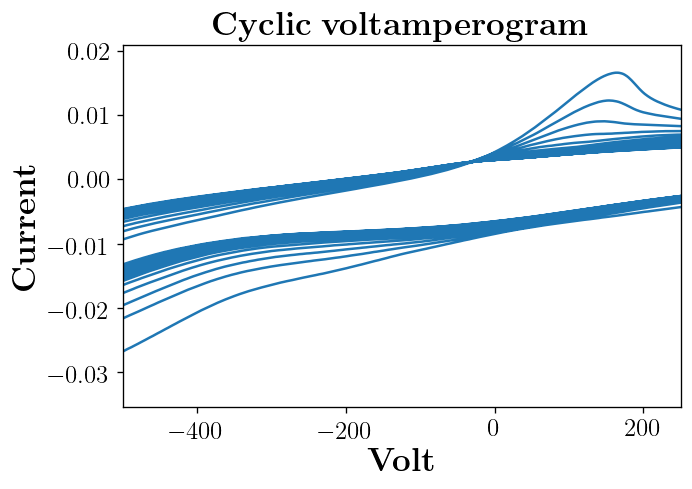

In [11]:
CV_plot(df_CV, g_xlim=[-500,250])

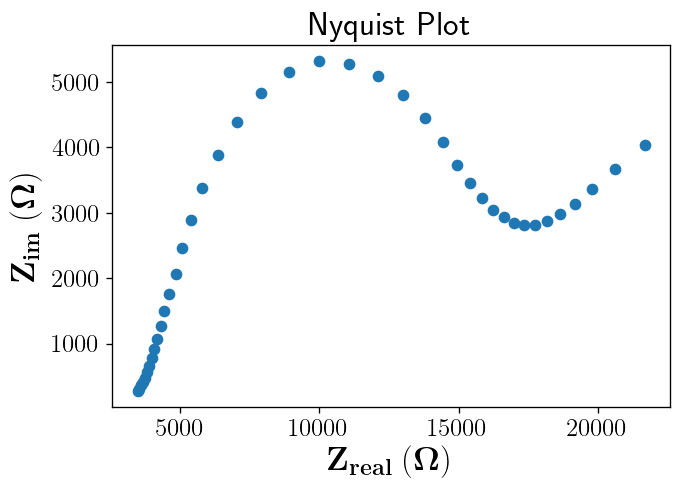

In [12]:
Nyq_plot(df_EIS, g_xlim='none', g_ylim='none', savefig='none')

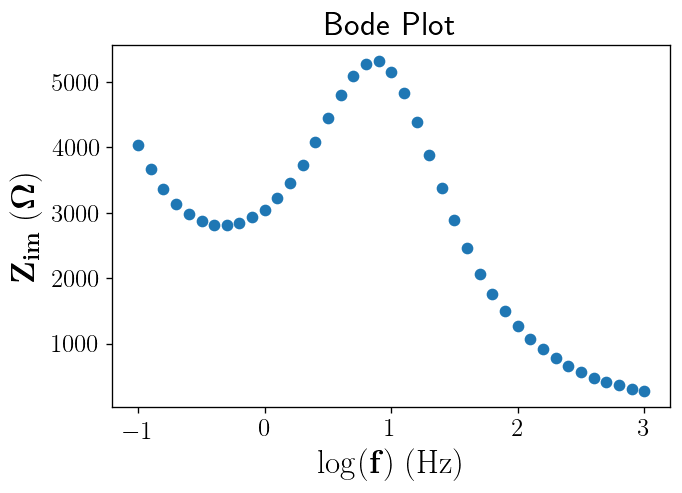

In [13]:
Bode_plot(df_EIS)